# Data Analysis using mtcars dataset

## Feature Infos

- mpg: Miles per Gallon (연비)
- cyl: Number of cylinders (엔진 실린더 개수)
- disp: Displacement (엔진 배기량)
- hp: Gross horsepower (최대 출력 마력)
- drat: Rear axle ratio (후륜 비율)
- wt: Weight (자동차의 무게)
- qsec: 1/4 mile time (가속 시간)
- vs: V/S 엔진 유형
- am: Transmission (Automatic / manual)
- gear: Number of forward gears (전진 기어 수)
- carb: Number of carburators (기화기 수)

## Import Library 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATASET_PATH = "mtcars.csv"

In [3]:
df = pd.read_csv(DATASET_PATH)

## head, tail, ...

In [4]:
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
df.tail()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [6]:
df.shape

(32, 12)

In [7]:
df.columns

Index(['Unnamed: 0', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')

In [8]:
df.rename(columns={"Unnamed: 0": "car_model"}, inplace=True)

In [9]:
df.columns

Index(['car_model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')

In [10]:
# df.info()를 진행했을 떄, 컬럼 이름, 데이터 타입, 데이터 개수 등을 확인할 수 있다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   car_model  32 non-null     object 
 1   mpg        32 non-null     float64
 2   cyl        32 non-null     int64  
 3   disp       32 non-null     float64
 4   hp         32 non-null     int64  
 5   drat       32 non-null     float64
 6   wt         32 non-null     float64
 7   qsec       32 non-null     float64
 8   vs         32 non-null     int64  
 9   am         32 non-null     int64  
 10  gear       32 non-null     int64  
 11  carb       32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [11]:
df.dtypes

car_model     object
mpg          float64
cyl            int64
disp         float64
hp             int64
drat         float64
wt           float64
qsec         float64
vs             int64
am             int64
gear           int64
carb           int64
dtype: object

In [12]:
# df.describe()를 통해 수치형 데이터에 대한 기술통계량을 확인할 수 있다.
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


## Gear, Transmission

In [13]:
print("Number of unique values in gear columns:", len(df["gear"].unique()))
print("Number of unique values in transmission columns:", len(df["am"].unique()))

Number of unique values in gear columns: 3
Number of unique values in transmission columns: 2


Text(0, 0.5, '# of Cars')

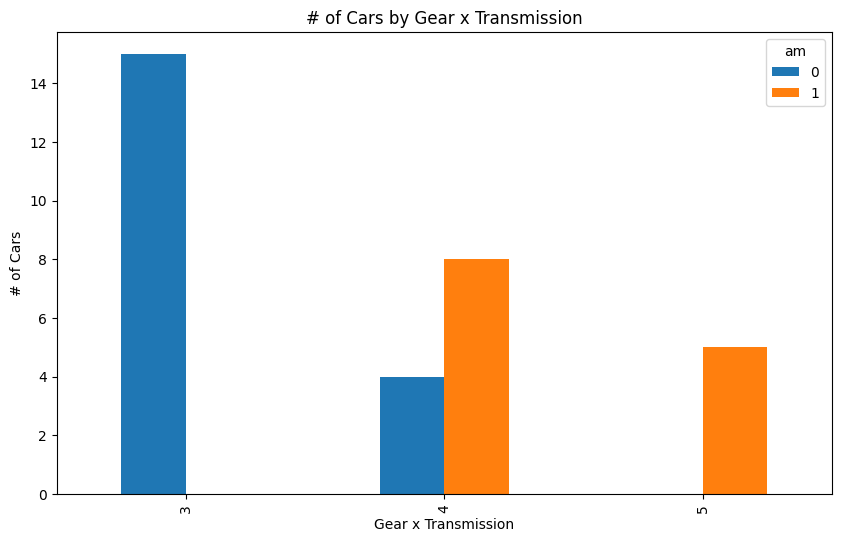

In [14]:
# visualize aggregation with pd.crosstab
aggregation = pd.crosstab(df["gear"], df["am"])

fig, ax = plt.subplots(figsize=(10, 6))
aggregation.plot(kind="bar", ax=ax)
plt.title("# of Cars by Gear x Transmission")
plt.xlabel("Gear x Transmission")
plt.ylabel("# of Cars")

Text(0, 0.5, '# of Cars')

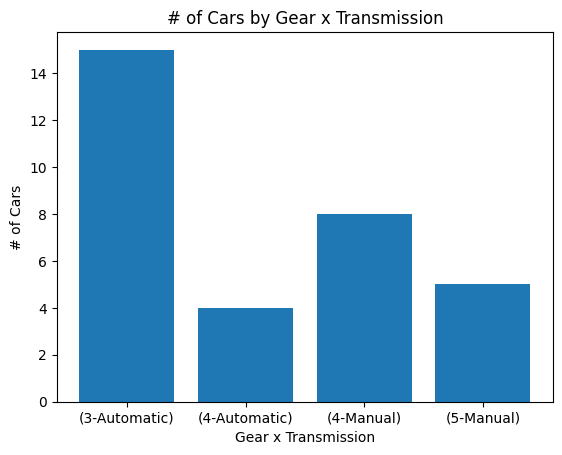

In [15]:
# visualize aggregation without pd.crosstab
aggregation = df.groupby(["gear", "am"]).size().reset_index(name="count")
aggregation["am"] = aggregation["am"].replace({0: "Automatic", 1: "Manual"})
aggregation["aggr_name"] = "("+ aggregation["gear"].astype(str) + "-" + aggregation["am"] + ")"

plt.bar(
    aggregation["aggr_name"], 
    aggregation["count"],
)
plt.title("# of Cars by Gear x Transmission")
plt.xlabel("Gear x Transmission")
plt.ylabel("# of Cars")

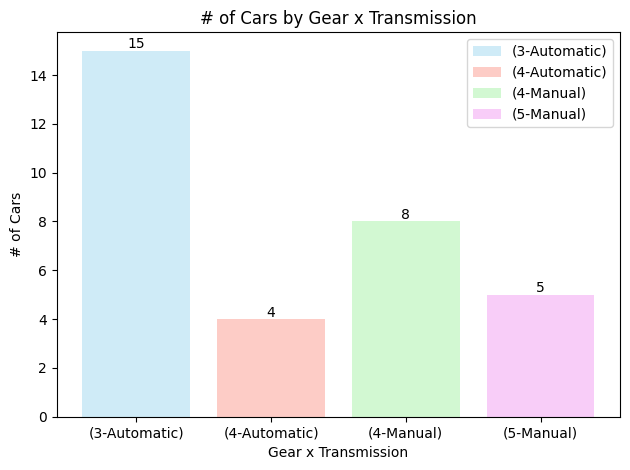

In [18]:
# More Prettier
colors = ["skyblue", "salmon", "lightgreen", "violet"]

plt.bar(
    aggregation["aggr_name"], 
    aggregation["count"],
    color=colors,
    alpha=0.4,
    label=aggregation["aggr_name"] # legend 표시
)
plt.title("# of Cars by Gear x Transmission")
plt.xlabel("Gear x Transmission")
plt.ylabel("# of Cars")

# 각 막대에 데이터 개수 표시
for i, v in enumerate(aggregation["count"]):
    plt.text(i, v+0.1, v, ha="center")

plt.legend()
plt.tight_layout()
plt.show()

## Histograms of Numeric Columns

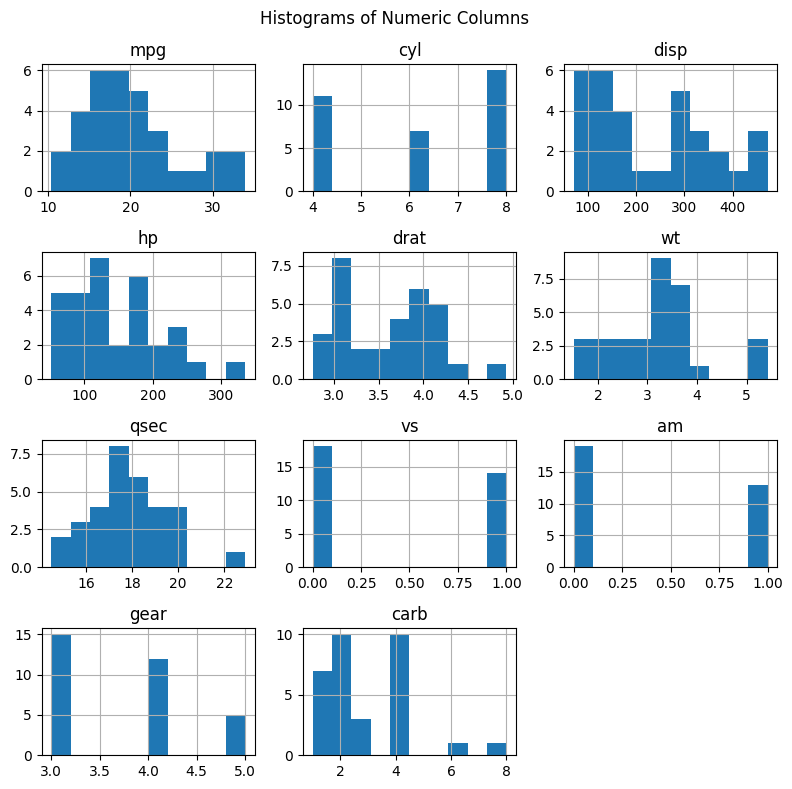

In [174]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(8, 8))
i = 0

for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        ax = axes[i//3, i%3]
        ax.hist(df[col])
        ax.set_title(col)
        ax.grid()
        i += 1
    else:
        continue
    
if i < 12:
    for idx in range(i, 12):
        fig.delaxes(axes.flatten()[idx])

fig.suptitle("Histograms of Numeric Columns")
plt.tight_layout()
plt.show()

## Cylinder vs HorsePower

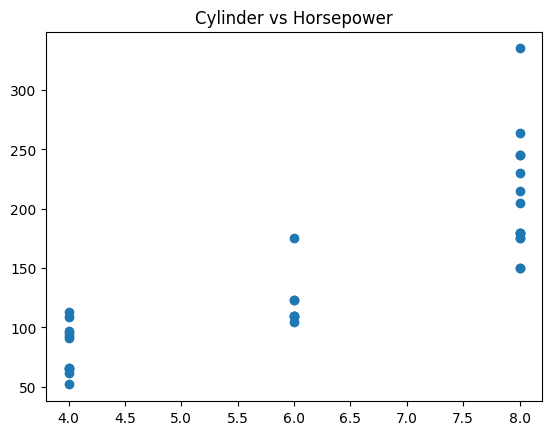

In [19]:
plt.scatter(df["cyl"], df["hp"])
plt.title("Cylinder vs Horsepower")
plt.show()

## MPG vs HorsePower

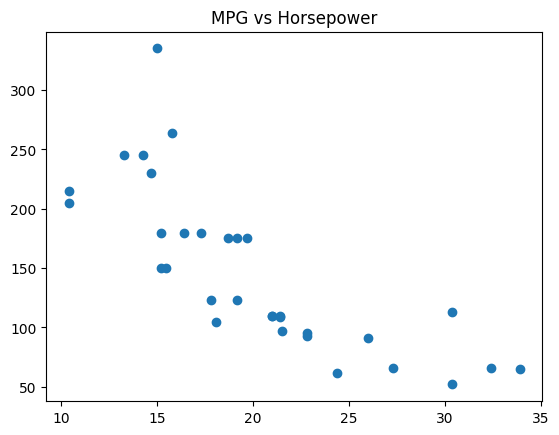

In [20]:
plt.scatter(df["mpg"], df["hp"])
plt.title("MPG vs Horsepower")
plt.show()

## Visualize correlation

<Axes: >

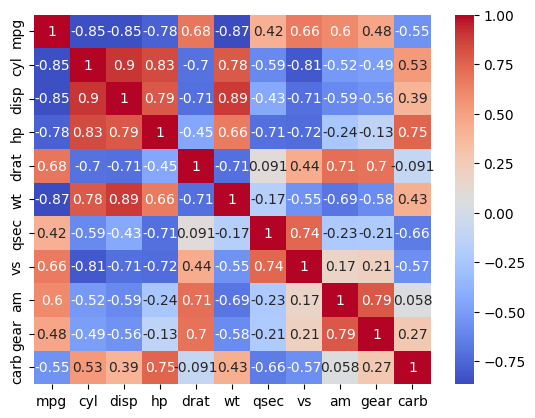

In [21]:
sub_df = df.drop(["car_model"], axis=1)
sns.heatmap(sub_df.corr(), annot=True, cmap="coolwarm")

## Advanced Study

In [7]:
def extract_corr_between_two_cols(df: pd.DataFrame, col1: str, col2: str) -> None:
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.regplot(x=col1, y=col2, data=df, ax=ax)
    corr = df[col1].corr(df[col2])
    
    plt.title("Corr:{}".format(corr))
    plt.tight_layout()
    plt.show()

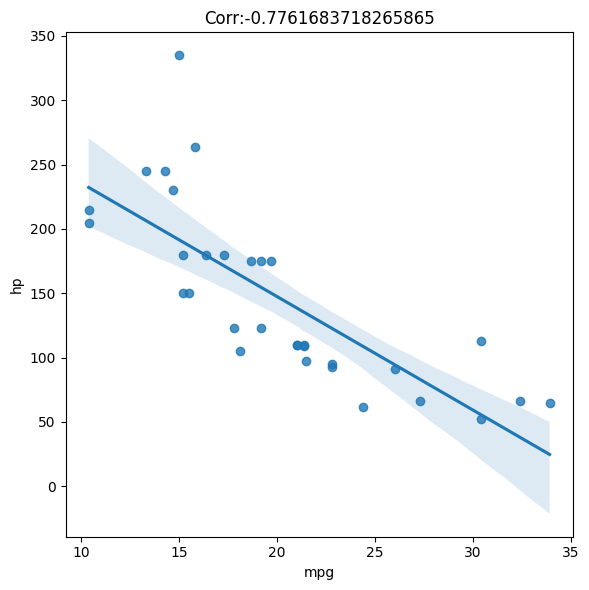

In [8]:
extract_corr_between_two_cols(df, "mpg", "hp")